# 4. Metrics and Conclusions

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 4.1. Load predictions

In [2]:
import pandas as pd
import numpy as np

base_path = '/content/drive/MyDrive/nlp/amazon'
testpredictions_df = pd.read_csv(base_path + '/predictions/test_predictions.csv')

y_test = testpredictions_df['sentiment']
yhat_xgb = testpredictions_df['xgb_pred']
yhat_lstm = np.where(testpredictions_df['lstm_pred'] < 0.5, 0, 1)
yhat_gpt2 = np.where(testpredictions_df['gpt2_pred'] < 0.5, 0, 1)

## 4.2. Metrics

In [3]:
from sklearn.metrics import classification_report

# XGBoost
print(classification_report(y_test, yhat_xgb, digits=4))

              precision    recall  f1-score   support

           0     0.8004    0.8854    0.8407      2042
           1     0.8699    0.7762    0.8204      2015

    accuracy                         0.8312      4057
   macro avg     0.8351    0.8308    0.8305      4057
weighted avg     0.8349    0.8312    0.8306      4057



In [4]:
# LSTM
print(classification_report(y_test, yhat_lstm, digits=4))

              precision    recall  f1-score   support

           0     0.8646    0.8472    0.8558      2042
           1     0.8482    0.8655    0.8568      2015

    accuracy                         0.8563      4057
   macro avg     0.8564    0.8564    0.8563      4057
weighted avg     0.8565    0.8563    0.8563      4057



In [5]:
# GPT-2
print(classification_report(y_test, yhat_gpt2, digits=4))

              precision    recall  f1-score   support

           0     0.7780    0.8408    0.8082      2042
           1     0.8243    0.7568    0.7891      2015

    accuracy                         0.7991      4057
   macro avg     0.8012    0.7988    0.7987      4057
weighted avg     0.8010    0.7991    0.7987      4057



## 4.3. Confusion Matrices

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def heatmap(y_test, yhat_test, title, ax):
  cf_matrix = confusion_matrix(y_test, yhat_test)
  total = np.sum(cf_matrix)
  labels = np.array([f'{e} \n {e / total * 100:.2f}%' for e in cf_matrix.flatten()])

  h = sns.heatmap(cf_matrix, annot=labels.reshape(2, 2), fmt='', cmap='Blues', cbar=False, ax=ax)
  h.set_title(title)
  h.xaxis.set_ticklabels(['Negative','Positive'])
  h.yaxis.set_ticklabels(['Negative','Positive'])

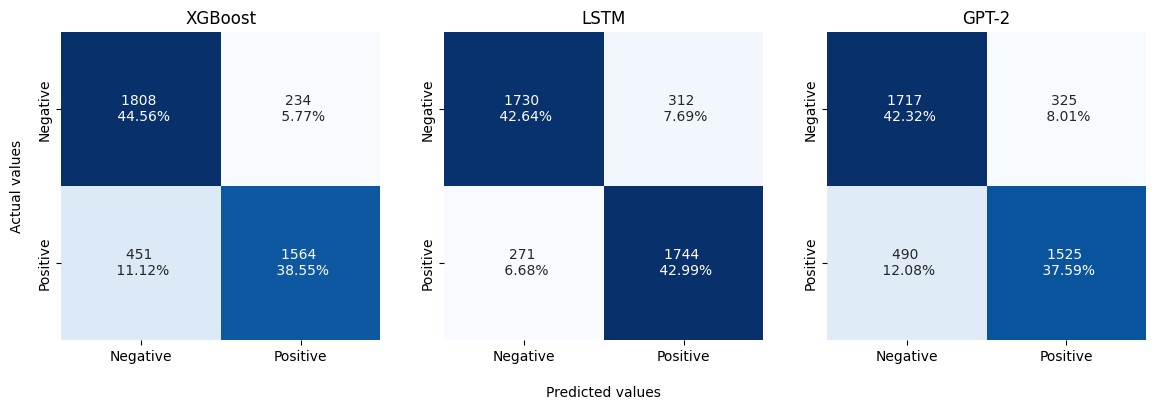

In [7]:
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_curve

fig, axs = plt.subplots(1, 3, figsize=(14, 4))

yhats = [yhat_xgb, yhat_lstm, yhat_gpt2]
titles = ['XGBoost', 'LSTM', 'GPT-2']
for yhat, title, ax in zip(yhats, titles, axs):
  heatmap(y_test, yhat, title, ax)

fig.add_subplot(111, frameon=False)
# Hide ticks and tick labels
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('\nPredicted values')
plt.ylabel('Actual values')

plt.show()

## 4.3. Conclusions

- El umbral utilizado para discriminar las predicciones dadas por cada modelo ha sido del $0.5$ ya que, como no se dispone de la información sobre cuál es el objetivo del estudio, es el nivel más neutral. Sin embargo, en función de la finalidad del análisis, se podría modificar el umbral para mejorar la clasificación de sentimiento de las reviews que fuesen más relevantes.

- En cuanto a la selección del modelo con mejores prestaciones, como el punto de partida inicial era un corpus balanceado con el mismo número de reviews positivas que negativas, la métrica que se va a tener en cuenta como más representativa de las prestaciones de cada modelo es el *accuracy*, por lo que de los tres modelos utilizados el modelo basado en una red LSTM ($85.63\%$) es el que mejor ha clasificado las reviews por sentimiento. Así mismo, en términos del *f1-score* el modelo seleccionado es superior a los demás.

- *Mejoras y siguientes iteraciones*. Debido a las limitaciones de tiempo y, especialmente, de recursos de cálculo, algunos cambios que se podrían introducir para intentar mejorar el análisis, suponinendo que no existan tales limitaciones, serían: (i) ampliar el tamaño del dataset, (ii) buscar hacer predicciones con más clases incluyendo la clase de sentimieto neutro o, incluso, tratar de hacer predicciones sobre el número de estrellas de las reviews, (iii) entrenar de forma más exhaustiva los modelos utilizados o (iv) utilizar otras arquitecturas de redes.